# Final Project for EPS 109 - Cave generation through cellular automata

### By: Virindh Borra

In [11]:
import matplotlib.pyplot as plt 
import numpy as np

plt.rcParams['figure.figsize'] = [10, 10]

from matplotlib.animation import FFMpegWriter
from matplotlib.image import FigureImage

metadata = dict(title='Cave Generation', artist='Virindh Borra',comment='Cellular Automata.')
writer = FFMpegWriter(fps=3, metadata=metadata,bitrate=200000)
fig = plt.figure(dpi=200)

<Figure size 2000x2000 with 0 Axes>

## Creating the initial world

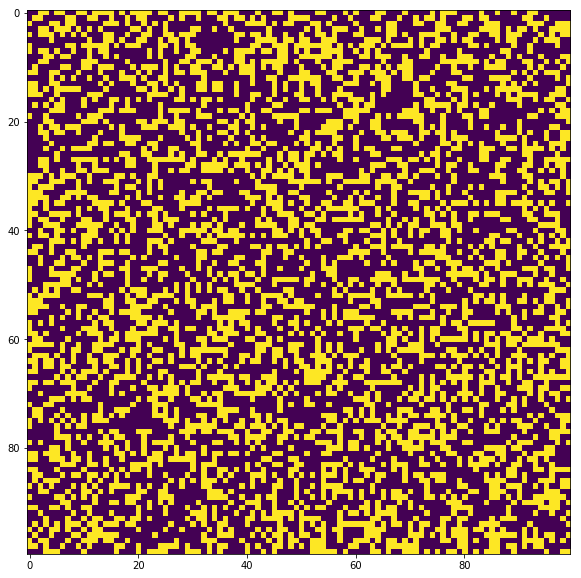

In [12]:
def generate_random_world(world_size=100):
    
    world = np.zeros((world_size, world_size))

    starting_active_probability = 0.4

    for x in range(world_size):
        for y in range(world_size):
            random_num = np.random.rand()
            # Every cell starts off with a random chance to be "active"
            if random_num < starting_active_probability:
                world[y][x] = 1
                
    return world
           
world = generate_random_world()
plt.imshow(world, interpolation='nearest')
plt.show()


## Application of the Cellular Automata Rule

Given a world representing all of the cells, we apply a rule to each cell to figure out if it should remain active or not after the iteration. In this singular iteration, we will pick the arbiary rule that follows, in hopes of generating a nice cave that we can use for a game:

If a given cell is active, and has less than `required_active_neighbors_to_stay_active` active neighbors, then we deactivate the cell. Otherwise, if the cell is active and has active neighbhors more than or equal to `required_active_neighbors_to_stay_active`, then we keep the cell active. 

If a given cell is inactive, and has more than `required_active_neighbors_to_reactivate` active neighbors, then we reactivate the cell. Otherwise, if the cell is inactive and has active neighbors less than or equal to `required_active_neighbors_to_reactivate`, then we keep the cell inactive. 

In each application of the rule, it done on each cell with respect to the existing world. 

An example of one single application of the rule is given below:

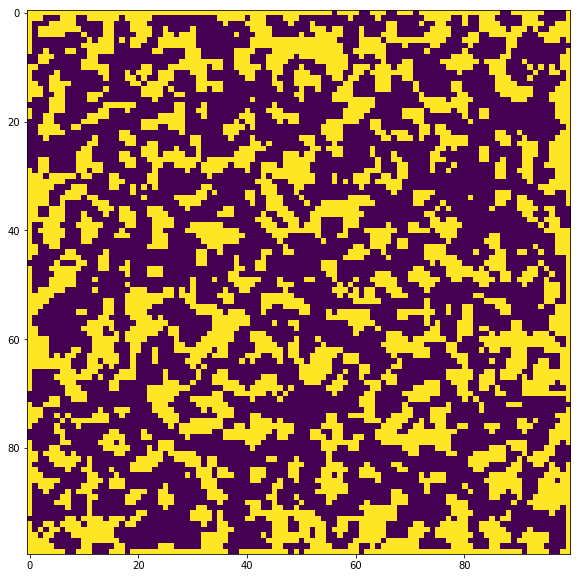

In [13]:
def get_active_neighbors_for_cell(world, x, y):
    active_neighbors = 0

    #Check the entire three by three grid around this index, the "surroundings"
    i_range = range(-1, 2)
    j_range = range(-1, 2)
    
    world_square_len = world.shape[0]
    other_len = world.shape[1]
    
    for i in i_range:
        for j in j_range:
            curr_cell_y = y + i
            curr_cell_x = x + j
            
            if i == 0 and j == 0:
                continue
                
            if curr_cell_y < 0 or curr_cell_x < 0 or curr_cell_y >= world_square_len or curr_cell_x >= world_square_len:
                active_neighbors += 1 #Count the walls and edges as alive
                continue
                
            if int(world[curr_cell_y][curr_cell_x]):
                active_neighbors += 1
    
    return active_neighbors

def apply_rule(world, required_active_neighbors_to_stay_active=3, required_active_neighbors_to_reactivate=4):
    
    #This function returns the new world, given the existing world
    new_world = np.zeros(world.shape)
    
    for x in range(world.shape[0]):
        for y in range(world.shape[1]):
            active_neighbors = get_active_neighbors_for_cell(world, x, y)
                        
            is_active = int(world[y][x])
            
            if is_active:
                if active_neighbors >= required_active_neighbors_to_stay_active:
                    new_world[y][x] = 1
                else:
                    new_world[y][x] = 0
            else:
                if active_neighbors > required_active_neighbors_to_reactivate:
                    new_world[y][x] = 1
                else:
                    new_world[y][x] = 0
                    
    return new_world


new_world = apply_rule(world)
plt.imshow(new_world, interpolation='nearest')
plt.show()

## Application of the rule until stabalization

We now apply this rule repeatedly until the cells have all stabilized (meaning there are no more changes on repeated applications of the rule), and we will have a system of "caves" for a level that we could potentially use in a video game.

In [14]:
with writer.saving(fig, "cellular_automata_development.mp4", dpi=200):

    ax = fig.add_axes([0,0,1,1])
    ax.imshow(world)
    writer.grab_frame()

    diff = world
    i = 0

    while(not np.array_equal(diff, np.zeros(world.shape))):
        print("Running Iteration {}".format(i))

        new_world = apply_rule(world)
        diff = np.subtract(world, new_world)
        world = new_world

        i += 1

        ax.imshow(world)
        writer.grab_frame()
        
print("Stabilized.")

Running Iteration 0
Running Iteration 1
Running Iteration 2
Running Iteration 3
Running Iteration 4
Running Iteration 5
Running Iteration 6
Running Iteration 7
Running Iteration 8
Running Iteration 9
Running Iteration 10
Running Iteration 11
Running Iteration 12
Running Iteration 13
Running Iteration 14
Running Iteration 15
Running Iteration 16
Running Iteration 17
Running Iteration 18
Running Iteration 19
Running Iteration 20
Running Iteration 21
Running Iteration 22
Running Iteration 23
Running Iteration 24
Running Iteration 25
Running Iteration 26
Running Iteration 27
Running Iteration 28
Running Iteration 29
Running Iteration 30
Running Iteration 31
Stabilized.


## How long does the system take to stablize on average?

Now, let's try and see how long it takes for the cells to converge given 10, 100, and 1000 cave generations, each time with a new and random world.

In [15]:
def run_until_convergence():
    
    world = generate_random_world()
    diff = world
    i = 0

    while(not np.array_equal(diff, np.zeros(world.shape))):

        new_world = apply_rule(world)
        diff = np.subtract(world, new_world)
        world = new_world

        i += 1
    return i

ten_generation_total = 0

for i in range(10):
    curr_iterations = run_until_convergence()
    ten_generation_total += curr_iterations
    
ten_generation_avg = ten_generation_total/10

print("Ten generation average is: {} iterations".format(ten_generation_avg))

hundred_generation_total = 0

for i in range(100):
    curr_iterations = run_until_convergence()
    hundred_generation_total += curr_iterations
    
hundred_generation_avg = hundred_generation_total/100

print("Hundred generation average is: {} iterations".format(hundred_generation_avg))


Ten generation average is: 21.2 iterations
Hundred generation average is: 22.39 iterations
